# 0. Preparation
## 0.1 Libraries Use
Here I use 
1. **networkX** to perform basic graph manipulation. 
1. **numpy** for numerical calculation. 
1. **matplotlib** for data visualization.
1. **zipfile** for data import.
1. **pandas** to deliver table data.

In [1]:
# libraries
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import zipfile as zp
import pandas as pd

# Tool libraries to assist computation (To accelerate some process or verify some values). 
# Does not influence the result of exercise
import random
import math
import itertools

## 0.2 Data
The data presented and used in this ipython notebook file may not be complete. Some of the data are pre-calculated as the runtime of some network algorithms is extremely long. The python kernel of notebook is fragile, so the instant variables might lose due to the kernel crash. As a result, I stored the backups of these data in a separate folder in .csv format. They are intelligibly named and the director is:
````
./data/.csv
````

## 0.3 Data Preprocessing

The **zipfile** library is used to import the graph data. The general process:
1. Obtain the name list of graphs in the zip file
1. Span the graph with built-in function of **networkX** and store them in a list

<br>I also sort the data of graph in ascending order of time</br>

In [2]:
# list of graphs
graphs = []
# list of graph's name (the file name)
names = []

prefix = 'bitcoin_data_coursework1/'
suffix = '.graphml'
with zp.ZipFile('bitcoin_data_coursework1.zip') as arc:
        all_name_list=arc.namelist()
        data_list_temp=list(filter(lambda f: str(f).startswith(prefix), all_name_list))
        name_list=list(filter(lambda f: str(f).endswith(suffix), data_list_temp))
        
        # Sort the list according to the alphabet order
        name_list.sort()
        # read the graphs
        for data_name in name_list:
            with arc.open(data_name) as file:
                graphs.append(nx.read_graphml(file))
                data_name=data_name.lstrip(prefix)
                data_name=data_name.rstrip(suffix)
                names.append(data_name)
                print("Graph loaded: "+ data_name) 

Graph loaded: 2013-09-09_to_2013-09-15
Graph loaded: 2013-09-16_to_2013-09-22
Graph loaded: 2013-09-23_to_2013-09-29
Graph loaded: 2013-09-30_to_2013-10-06
Graph loaded: 2013-10-07_to_2013-10-13
Graph loaded: 2013-10-14_to_2013-10-20
Graph loaded: 2013-10-21_to_2013-10-27
Graph loaded: 2013-10-28_to_2013-11-03
Graph loaded: 2013-11-04_to_2013-11-10
Graph loaded: 2013-11-11_to_2013-11-17
Graph loaded: 2013-11-18_to_2013-11-24
Graph loaded: 2013-11-25_to_2013-12-01
Graph loaded: 2013-12-02_to_2013-12-08


In [7]:
# redundance codes to check the data integrity
for index in range(0,len(graphs)):
    print(names[index] + " is weakly connected? ", nx.is_weakly_connected(graphs[index]))

2013-09-09_to_2013-09-15 is weakly connected?  False
2013-09-16_to_2013-09-22 is weakly connected?  False
2013-09-23_to_2013-09-29 is weakly connected?  False
2013-09-30_to_2013-10-06 is weakly connected?  False
2013-10-07_to_2013-10-13 is weakly connected?  False
2013-10-14_to_2013-10-20 is weakly connected?  False
2013-10-21_to_2013-10-27 is weakly connected?  False
2013-10-28_to_2013-11-03 is weakly connected?  False
2013-11-04_to_2013-11-10 is weakly connected?  False
2013-11-11_to_2013-11-17 is weakly connected?  False
2013-11-18_to_2013-11-24 is weakly connected?  False
2013-11-25_to_2013-12-01 is weakly connected?  False
2013-12-02_to_2013-12-08 is weakly connected?  False


# PART I 
## Exercise 1.1

First to obtain the Giant Strongly Connected Component (GSCC) of this graphs: 

In [3]:
GSCC = []
def getGSCC(graphs):
    for graph in graphs:
        components = nx.strongly_connected_components(graph) 
        G_strong = nx.subgraph(graph, max(components, key = len)) 
        GSCC.append(G_strong)

getGSCC(graphs)

In [10]:
# redundance codes to verify the correctness of data manipulation
for index in range(0,len(GSCC)):
    print(names[index] + " is strongly connected? ", nx.is_strongly_connected(GSCC[index]))

2013-09-09_to_2013-09-15 is strongly connected?  True
2013-09-16_to_2013-09-22 is strongly connected?  True
2013-09-23_to_2013-09-29 is strongly connected?  True
2013-09-30_to_2013-10-06 is strongly connected?  True
2013-10-07_to_2013-10-13 is strongly connected?  True
2013-10-14_to_2013-10-20 is strongly connected?  True
2013-10-21_to_2013-10-27 is strongly connected?  True
2013-10-28_to_2013-11-03 is strongly connected?  True
2013-11-04_to_2013-11-10 is strongly connected?  True
2013-11-11_to_2013-11-17 is strongly connected?  True
2013-11-18_to_2013-11-24 is strongly connected?  True
2013-11-25_to_2013-12-01 is strongly connected?  True
2013-12-02_to_2013-12-08 is strongly connected?  True


To ease the difficulty of calculation I separate the easy-to-calculate data and the time consuming ones:

In [196]:
def getBasicStats(G):
    N = nx.number_of_nodes(G)
    #     print(N)
    
    nodeNum = G.number_of_nodes()
    linkNum = G.number_of_edges()
    Density = nx.density(G)
    
    list_inDegree = np.array(G.in_degree())[:,1].astype(float)
    list_outDegree = np.array(G.out_degree())[:,1].astype(float)
    list_totalDegree = np.array(G.degree())[:,1].astype(float)
    
    avg_inDegree = list_inDegree.sum() / N
    avg_outDegree = list_outDegree.sum() / N
    avg_degree = list_totalDegree.sum() / N
    
    max_inDegree = np.amax(list_inDegree)
    max_outDegree = np.amax(list_outDegree)
    max_degree = np.amax(list_totalDegree)
    
    avg_inStrength = list_inStrength = np.array(G.in_degree(weight="qty")).astype(float).sum() / N
    avg_outStrength = list_outStrength = np.array(G.out_degree(weight="qty")).astype(float).sum() / N 
    avg_strength = list_totalStrength = np.array(G.degree(weight="qty"))[:,1].astype(float).sum() / N

    return [nodeNum, linkNum, Density,
           avg_inDegree, avg_outDegree, avg_degree,
           max_inDegree, max_outDegree, max_degree,
           avg_inStrength, avg_outStrength, avg_strength]

# function to compute the time-wasted items
def getComplexStats(G):
    N = nx.number_of_nodes(G)
    shortestPathList=nx.shortest_path_length(G)
    shortestPathArray=np.array(shortestPathList)[:,1]
    
    avg_clusteringCoefficient = nx.average_clustering(G)
    # The diameter is the longest shortest path length of all nodes of a graph
    # To decrease the repeated calculations, I use nx.shortest_path_length function
    avg_pathLength = shortestPathArray.sum()/N
    diameter = np.amax(shortestPathArray)
    
    return [avg_pathLength, diameter, avg_clusteringCoefficient]

In [197]:
data = []
data_basic = []
for G in GSCC:
    data_basic.append(getBasicStats(G))

In [ ]:
data_complex = []
for G in GSCC:
    data_complex.append(getComplexStats(G))

In [ ]:
data=list(np.concatenate([np.array(data_basic), np.array(data_complex)], axis=1))

In [231]:
col_labels=['Number of nodes', 'Number of links', 'Density'
            ,'Average in-degree', 'Average out-degree','Average total degree'
            ,'Maximum in-degree', 'Maximum out-degree', 'Maximum total degree'
            ,'Average in-strength', 'Average out-strength', 'Average total strength'
            ,' Average path length', 'Diameter','Average clustering coefficient'
           ]

df = pd.DataFrame(
    data,
    index=names,
    columns=col_labels
)
pd.set_option('display.width', 1000)
pd.set_option("display.max_columns", None)

df

,Number of nodes,Number of links,Density,Average in-degree,Average out-degree,Average total degree,Maximum in-degree,Maximum out-degree,Maximum total degree,Average in-strength,Average out-strength,Average total strength,Average shortest path length,Diameter,Average clustering coefficient
2013-09-09_to_2013-09-15,59574,148959,0.000042,2.500403,2.500403,5.000806,29021,15264,44285,23.995667,23.995667,47.991334,7.570300706,291,0.114752
2013-09-16_to_2013-09-22,60774,153809,0.000042,2.530836,2.530836,5.061671,29778,15198,44976,26.439220,26.439220,52.878441,7.48833107,230,0.116856
2013-09-23_to_2013-09-29,60619,153914,0.000042,2.539039,2.539039,5.078078,31086,15965,47051,29.573710,29.573710,59.147420,Na,146,0.121982
2013-09-30_to_2013-10-06,65944,166822,0.000038,2.529753,2.529753,5.059505,30185,15972,46157,30.706182,30.706182,61.412364,7.681334487,187,0.111434
2013-10-07_to_2013-10-13,64295,163760,0.000040,2.547010,2.547010,5.094020,30048,16136,46184,27.575940,27.575940,55.151879,10.09391679,274,0.117625
2013-10-14_to_2013-10-20,69933,176285,0.000036,2.520770,2.520770,5.041540,33142,19229,52371,28.992855,28.992855,57.985710,Na,266,0.108987
2013-10-21_to_2013-10-27,80556,214668,0.000033,2.664829,2.664829,5.329659,38376,22074,60450,27.780600,27.780600,55.561201,Na,271,0.122053
2013-10-28_to_2013-11-03,71727,185615,0.000036,2.587798,2.587798,5.175596,33397,17952,51349,23.529886,23.529886,47.059773,Na,177,0.110815
2013-11-04_to_2013-11-10,97739,259483,0.000027,2.654856,2.654856,5.309713,43200,24946,68146,25.209999,25.209999,50.419997,Na,Na,0.105403
2013-11-11_to_2013-11-17,96291,257001,0.000028,2.669003,2.669003,5.338007,42679,24588,67267,35.354349,35.354349,70.708698,Na,Na,0.101211


As there are some data missing in average shortest path length and diameter, the statstics of them were calculated with the data available.
Given the data above, summary statistics could be calculated as follow:

In [220]:
data_matrix = np.array(data)
stats_names = ['mean', 'Median', 'Maximum', 'Minimum', 'Standard deviation']
# Data buffer
data_stats = []

for counter in range(0, len(col_labels)):
    mean=np.mean(data_matrix[:,counter])
    median=np.median(data_matrix[:,counter])
    maximum=np.max(data_matrix[:,counter])
    minimum=np.min(data_matrix[:,counter])
    std=np.std(data_matrix[:,counter])
    data_stats.append([mean, median, maximum, minimum, std])
    
temp = np.array(data_stats)
data_stats=list(temp.T)

df_stats = pd.DataFrame(
    data_stats,
    index=stats_names,
    columns=col_labels
)

df_stats

,Number of nodes,Number of links,Density,Average in-degree,Average out-degree,Average total degree,Maximum in-degree,Maximum out-degree,Maximum total degree,Average in-strength,Average out-strength,Average total strength,Average shortest path length,Diameter,Average clustering coefficient
mean,92772.15385,246539.3077,0.000032,2.618975,2.618975,5.237949,44296.84615,22655.076920,66951.92308,30.823555,30.823555,61.647111,8.208471,230.250000,0.109970
Median,71727.00000,185615.0000,0.000036,2.587798,2.587798,5.175596,33397.00000,19229.000000,52371.00000,28.992855,28.992855,57.985710,7.625818,248.000000,0.110815
Maximum,165772.00000,463363.0000,0.000042,2.795183,2.795183,5.590365,88358.00000,37205.000000,125563.00000,45.653230,45.653230,91.306461,10.093917,291.000000,0.122053
Minimum,59574.00000,148959.0000,0.000017,2.500403,2.500403,5.000806,29021.00000,15198.000000,44285.00000,23.529886,23.529886,47.059773,7.488331,146.000000,0.095868
Standard deviation,38674.53532,112990.0500,0.000009,0.098123,0.098123,0.196246,19664.31781,7884.613355,27411.83800,6.479883,6.479883,12.959766,1.259450,53.914615,0.008760


## Exercise 1.2
In this exercise, the **first week** of data is used, which is form 2013-09-09 to 2013-09-15.The reason for using this sort of data is because:
1. **Far away from the price bubble period**. While the price bubble may affect people's decisions and behaviour on bitcoin transactions, these data are believed to contain the purest characteristics of the network.
1. **Contains the least nodes and edges**. It eases the difficulty for computation and allows to focus on the data analyse.

The following graphs illustrate the degree distribution:

In [35]:
# Use data between 2013-09-09 an 2013-09-15, week1
G=GSCC[0]

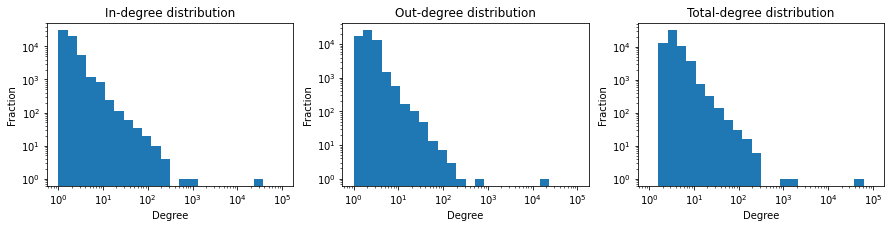

In [77]:
bins = np.logspace(np.log10(1), np.log10(1e5), 25)

def plot_hist(degrees):
    plt.hist([deg for _, deg in degrees], bins)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Degree')
    plt.ylabel('Fraction')

plt.figure(figsize = (15, 3))

plt.subplot(1, 3, 1)
plt.title('In-degree distribution')
plot_hist(G.in_degree())

plt.subplot(1, 3, 2)
plt.title('Out-degree distribution')
plot_hist(G.out_degree())

plt.subplot(1, 3, 3)
plt.title('Total-degree distribution')
plot_hist(G.degree())

plt.show()

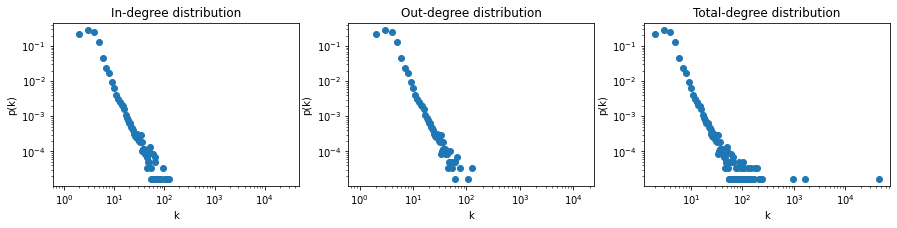

In [73]:
def plot_scatter(degrees):
    distribution_dict=dict([i, test.count(i)] for i in [deg for _, deg in degrees])
    distribution_array=np.array(list(distribution_dict.items()))
    plt.scatter(distribution_array[:,0], distribution_array[:,1]/distribution_array[:,1].sum())
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('k')
    plt.ylabel('p(k)')

plt.figure(figsize = (15, 3))
    
plt.subplot(1, 3, 1)
plt.title('In-degree distribution')
plot_scatter(G.in_degree())

plt.subplot(1, 3, 2)
plt.title('Out-degree distribution')
plot_scatter(G.out_degree())

plt.subplot(1, 3, 3)
plt.title('Total-degree distribution')
plot_scatter(G.degree())

The graphs demostrate that the bitcoin transaction network presents a clear curve of **power-law distribution**. As a result, it is reasonable to assert that the bitcoin transaction network is a **scale-free network**. The reasons are:
### Degree Distribution
The scale-free network refers to the networks that degree distribution follows a power law. That is $p(k)$ of nodes in the network having $k$ connections to other nodes goes for large values of $k$ as:
$$p(k)\approx k^{-\gamma}$$
$$\gamma\approx-\log_k{p(k)}$$

In [118]:
k_w1=np.array([degree for _, degree in G.degree()])
k=np.median(k_w1)
pk=np.sum(k_w1==k)/np.sum(k_w1)
gamma=-math.log(pk, k)
print("gamma= ",gamma)

gamma=  2.1664521570364217


In [119]:
estimate_gamma=3
gamma_error=abs(gamma-estimate_gamma)/gamma
print("The error of gamma is: ", gamma_error)

The error of gamma is:  0.3847524812658787


In this case, I use the median values to derive the relation of the distribution $p(k)$ and the degree $k$. It gives the relationship: $p(k)\approx k^{-2.16}$. The degree distribution of **BA (Barabasi-Albert) network** is roughly $p(k)\approx k^{-3}$ as the error of gamma is rather small. So there is a probability that the bitcoin transaction network is a BA network with a **classical fitness function (base on the degree of the node) for preferential attachment** in terms of degree distribution. 

As for the random network, specifically **ER (Erdős–Rényi) network** in this case, the degree distribution should present **binomial distribution**, which gives $$p(k)={N \choose k}p^k(1-p)^{N-1-k}$$ The graph should be like:


![](./pic/1.png)

It shows a significantly difference with bitcoin traction network. 

As for the **small world network (Watts-Strogatz)**, each node would have the same amount of links (Connect a node to its $k$ Nearest neighbours). The distribution of degree should be a straight line since every nodes would have the same number of degree $k$, which is contradict to the result.

### Clustering Coefficient

I also researh into the distribution of clustering coefficient $C(k)$. Here I plot the distribution of node's degree $k$ and the corresponding clustering coefficient $C(k)$

In [80]:
ck=nx.clustering(G)
ck_value=np.array(list(ck.values()))

Again, the median value of $k$ is used to estimate the relationship of $C(k)$ and $k$.

Text(0, 0.5, 'C(k)')

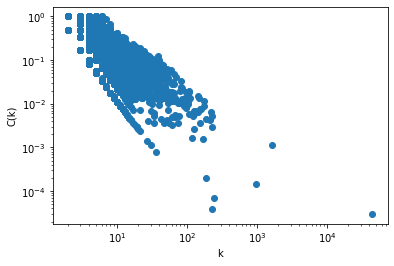

In [246]:
plt.scatter(k_w1, ck_value)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('C(k)')

It can be learned from the graph that the clustering coefficient of bitcoin network also rougly converges in power-law. The relationship of BA network generally follows: $$C(k)\approx k^{-1}$$

To verify the property, again we use the median $k$ for estimation:

In [256]:
median_nodes=[node_id for node_id, degree in G.degree() if(degree == k)]
median_node=random.choice(median_nodes)
median_node

'4224160'

In [247]:
median_ck=nx.clustering(G, median_node)
print("The median k = ", k)
print("The median c(k) = ", median_ck)

The median k =  4.0
The median c(k) =  0.16666666666666666


In [245]:
estimate_ck=1/k
ck_error=(median_ck-estimate_ck)/median_ck
print('The error of clustering coefficient is: ', ck_error)

The error of clustering coefficient is:  -0.5000000000000001


As the absolute value of estimated error $|error_{c(k)}|<1$, which seems tolerable. The analyse of clustering coefficient also support that the bitcoin transaction network is a scale-free network.

For the random network (Erdős–Rényi), the clustering coefficient is $$C(k) = p$$ It means that it will converage around a certain probability value, which is not in line with the data.

As for the small world network (Watts-Strogatz), the clustering coefficient is roughly around $C(k) = \dfrac{k}{N}$. As the algorithm feature decide that the $k$ is a fixed number. This means that initially, each node generates a fixed amount of links with neighbours. After that, these links are randomly disturbed with nodes. Theoretically, every nodes are exposed to equal opportunity to form triangles. However, the bitcoin transaction network shows a difference on the distribution of clustering coefficient.

### Diameter & Average shortest path length

The data presented in Exercise 1 gives that the diameter for week1 is:
$$d(week1)=297$$
And the average shortest path langth (ASPL) is:
$$l(week1)=7.570300706$$
The definition of diameter is the maximum shortest paths of all pair of nodes in a network. These pieces of data provide insight into the efficiency of information or mass transport on a network  (Mao  and  Zhang,  2013). Specifically in the bitcoin transaction network, the data describe the efficiency of bitcoin transference amount traders. In this case, I also research in the relationship of diamter and the network size $N$ with three different network.

In [22]:
N_week1=G.number_of_nodes()
ASPL=data[0][12]

In BA network, the relation of diameter and network size roughly follows: 
$$l\approx\dfrac{\ln N}{\ln \ln N}$$

In [30]:
estimate_ASPL=math.log(N_week1)/math.log(math.log(N_week1))
ASPL_error=(ASPL-estimate_ASPL)/estimate_ASPL
print('The error of ASPL of week 1 is: ', ASPL_error)

The error of ASPL of week 1 is:  0.6506931303506265


The error of ASPL is large in this case. However, in consideration of the network size, the estimated value and the actual value are generally in the same order of magnitude. So it is reasonable to convince that the bitcoin transaction network is a BA network.

For random network (Erdős–Rényi), the shortest path length $l$ of a certain node satisfies that $$k(k − 1)^{l-1} ≈ k ^{l}$$
This means that the diameter of the network should be $$l_{max}=\log_{k}N$$

In [258]:
estimate_ER_diameter=math.log(N_week1, k)
print('The estimated diameter of ER network is: ', estimate_ER_diameter)

The estimated diameter of ER network is:  7.931197604655606


The number is far smaller than the actual diameter value $d(week1)=297$. The diameter fomula remains the same for small world network (Watts-Strogatz), because both of the algorithms do not contain any priority strategy (preferential attachment) to add new nodes. As a result, the bitcoin transaction network is not a small world network.

## Exercise 1.3
Given the data above, the graphs the 9 quantities in temporal evolution diagrams would be (Some data were missing):

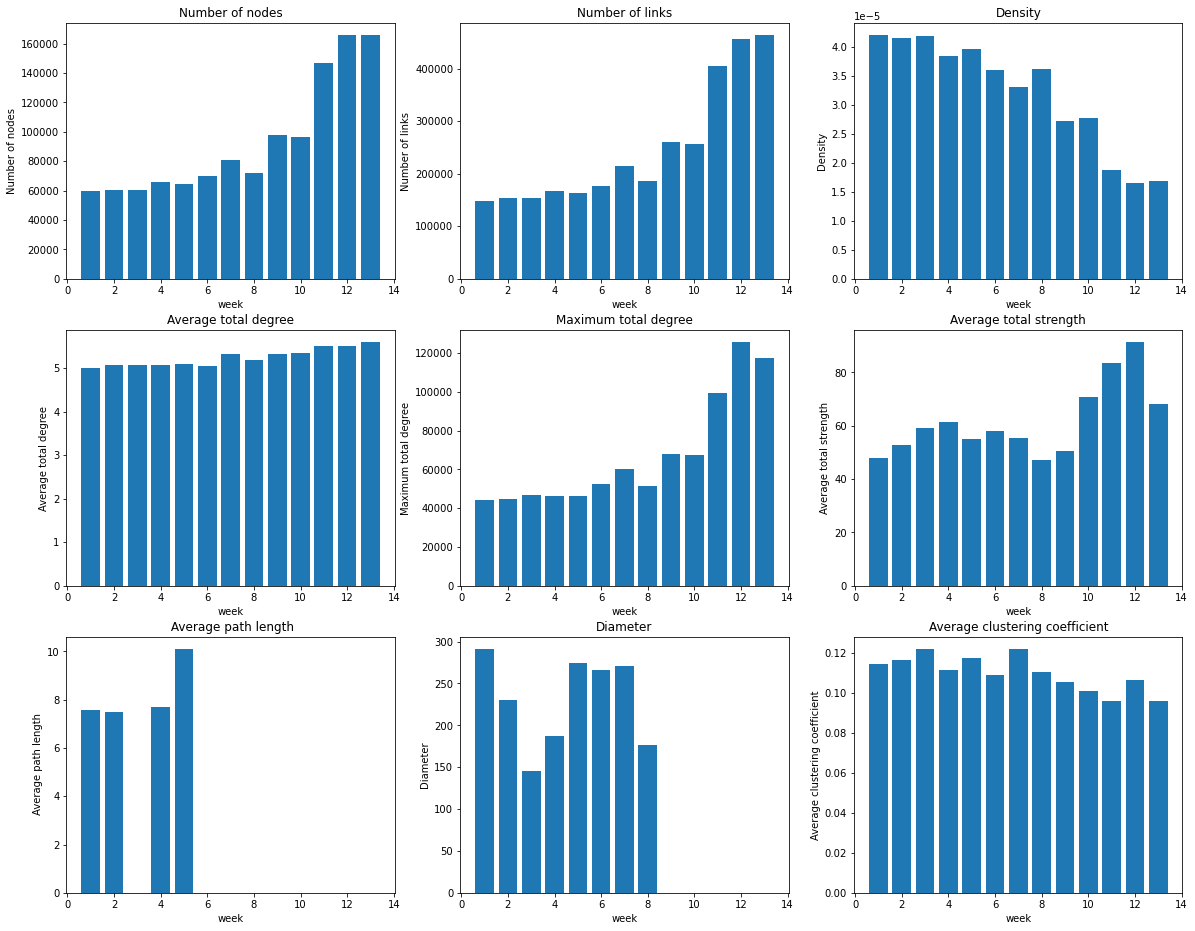

In [263]:
weekNum=len(names)
time_scale=range(1,weekNum+1)
                      
plt.figure(figsize = (20, 16))

graph_num=1;
for counter in range(15):
    # Except the in and out data
    if counter+1 in [4,5,7,8,10,11]:
        continue
    plt.subplot(3,3,graph_num)
    graph_num+=1
    plt.bar(time_scale, np.array(data)[:,counter])
    plt.title(col_labels[counter])
    plt.xlabel('week')
    plt.ylabel(col_labels[counter])

### General tendency (Whether these quantities evolved in the way that you expected, and why)
The quantities generally evolved as my expectation except few abnormal changes during the price bubble period. 

The bitcoin is a kind of decentralized currency and every transactions were recorded. This means that the nodes and links in a transaction network would keep expending. The graphs generally illustrate the tendancy except the abnormal decline saw in week 8. This might due to the cyber attacks which cause the split of bitcoin block chain and the bitcoin loss.

As it is evaluated in Exercise 1.2, the bitcoin transaction network might be a scale-free network, which means new nodes were added to the network evenly according to a specific rule (fitness function). Usually, the old nodes would have great advantage over the later-joined nodes. This might account for the almost constant average-total-degree and the increasing maximum-total-degree, because the oldest nodes keep connecting to the new nodes with higher possibility.

### Any signal that might have predicted the bubble
The price bubble began in week 5, in this week, an anomalous decrease on average-total-strength and increase on density can be spotted. This might infer that less quantity of bitcoins were used averagely among transactions. Suppose the total transaction demand remain unchanged. It means that each transaction is conducted in a lower amount of bitcoin. This indicated the rise of bitcoin value.

### Any signiﬁcant change during the bubble
During the bubble period, notably in week 8, it saw an unusual reduction on both the nodes and links. As it is mentioned above, in information on a bitcoin transaction track is not likely to lose. This might due to the attack which cause the evaporation of bitcoins. Accordingly, the unit price of bitcoin raised significantly and eventually led to the price bubble.

etc.


### Any signiﬁcant change after the bubble
The price bubble ends in week 11, 

# Part II
## Exercise 2.1

The three weeks I choose:
1. Before bubble, **week 1**: The data of this week is the most far away from the price bubble, which could provide an insight on the characteristics of bitcoin network.
1. During bubble, **week 8**: In this week, the total number of nodes and links abnormally reduced compared to the last few weeks. As the total amount of information in the block chain can not be reduced due to its design, the anomalous decline might be caused by a cyber attack. As a result, the changes of network properties is vital for victimization analyse.
1. After bubble, **week 13**: The week after the price bubble period. To see the changes of network properties. 

In [260]:
G1 = GSCC[0]
G2 = GSCC[7]
G3 = GSCC[12]

In this part of exercise, I use three all three centrality concepts to measure the significance of nodes, which is:
1. **degree centrality**: The number of degree of one node. It measure directly the connectivity of one node. In a BA network, this ability is affected by the preferential attachment directly. The changes of degree centrality provide direct insight into how new node are added to the network.
1. **eigenvector centrality**: centrality computes the centrality for a node based on the centrality of its neighbors. Accordingly, a node with a high eigenvector score is one that is adjacent to nodes that also have high eigenvector scores(Borgatti, 2005). This measure is essential for discovering central hubs such as exchanges, miners, or “laundry services” that are important nodes in the Bitcoin network (Baumann and Fabian etc., 2014).

In my opinion, bitcoin transaction network belongs to financial network. The weight of edge represent the quantity of transactions (the `qty` attribute). Since the bitcoin is a kind of decentralized currency, which means the transactions happen in a bitcoin network are more likely between parties directly without any medium, instead of researching on the betweenness of nodes, I focus more on the transaction behavior itself, which is closely related to security issues.

As it is showed at degree distribution diagram in Exercise 1.2, there exist few nodes with higher degree than others. I believe that these nodes play a pivotal role in the transaction network and through which we can have a insight on the cause of price bubble. Therefore, I measured the closeness centrality, which illustrate how close one node is to other nodes, and tryed to find the **hubs** of the network.

For each of the centrality, I pick up the 10 best performance nodes

Here is the necessary tool functions for centrality measurement

In [373]:
# Obtian the top nodes with its degree
def top_ten(deg_dist):
    return [[id,degree] for id, degree in sorted(deg_dist, key = lambda p: -p[1])][:10]

def logloghist(dist, xmin, xmax, bins = 25):
    plt.hist(list(dist), bins = np.geomspace(xmin, xmax, bins))
    plt.xscale('log')
    plt.yscale('log')

def calculateStats(G, eigen_centrality):
    top10_degree=np.array(top_ten(G.degree()))
    top10_degree_strength=np.array(top_ten(G.degree(weight="qty")))
    top10_degree_complete=np.concatenate([top10_degree, top10_degree_strength], axis=1)

    top10_eigen=np.array(top_ten(eigen_centrality.items()))
    top10_eigen_degree=np.array([degree for _, degree in G.degree(top10_eigen[:,0])]).T
    top10_eigen_strength=np.array([degree for _, degree in G.degree(top10_eigen[:,0], weight="qty")])
    top10_eigen_temp=np.concatenate([top10_eigen, np.array([top10_eigen_degree]).T], axis=1)
    top10_eigen_complete=np.concatenate([top10_eigen_temp, np.array([top10_eigen_strength]).T], axis=1)
    
    return [top10_degree_complete, top10_eigen_complete]

def plot_table(degree, eigen):
    rank=list(range(1,11))
    df_=pd.DataFrame({
        'Node (Degree centrality)': list(degree[:,0]),
        'Degree centrality':list(degree[:,1]),
        'Strength (Degree centrality)': list(degree[:,2]),
        'Node (Eigen centrality)':list(eigen[:,0]),
        'Eigen centrality':list(eigen[:,1]),
        'Degree (Eigen centrality)': list(eigen[:,2]),
        'Strength (Eigen centrality)': list(eigen[:,3])
        },
        index=rank
    )
    return df_

In [ ]:
# Katz centrality -- out of memory, not work
katz_centrality_G1=nx.katz_centrality_numpy(G1, weight="qty")
katz_centrality_G2=nx.katz_centrality_numpy(G2, weight="qty")
katz_centrality_G3=nx.katz_centrality_numpy(G3, weight="qty")

In [ ]:
# Eigen centrality
eigen_centrality_G1=nx.eigenvector_centrality_numpy(G1, weight="qty")
eigen_centrality_G2=nx.eigenvector_centrality_numpy(G2, weight="qty")
eigen_centrality_G3=nx.eigenvector_centrality_numpy(G3, weight="qty")

### Before the bubble

In [377]:
[top10_degree_week1, top10_eigen_week1]=calculateStats(G1, eigen_centrality_G1)

df_before=plot_table(top10_degree_week1, top10_eigen_week1)
df_before

,Node (Degree centrality),Degree centrality,Strength (Degree centrality),Node (Eigen centrality),Eigen centrality,Degree (Eigen centrality),Strength (Eigen centrality)
1,24778,44285,24778,1056959,0.6527250342066321,1604,48820.33962495007
2,1056959,1604,1056959,4224108,0.5516199740736305,8,21423.20975519
3,3941484,964,4224108,2696272,0.3238269084029462,2,11815.643285400001
4,3483370,243,46606,4191029,0.26305325828229476,5,10883.25242798
5,3375464,230,4086705,2216968,0.1828566872871267,22,8747.0498
6,4163907,229,2121345,24778,0.14461401611480132,44285,415860.2060226785
7,3183164,224,2696272,2121345,0.08232392861487074,69,12108.401467929998
8,4158569,221,2300615,4191803,0.052444879973456406,9,1681.6416294599999
9,2508019,213,4191029,4225205,0.05025142321858903,3,7999.9995
10,3697450,189,3163935,2881501,0.04545275534255438,20,7235.167611999999


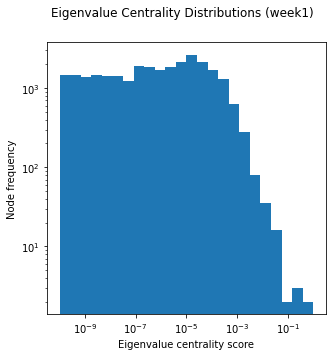

In [402]:
plt.figure(figsize = (5, 5))
plt.suptitle('Eigenvalue Centrality Distributions (week1)')
logloghist(eigen_centrality_G1.values(), 1e-10, 1)
plt.xlabel('Eigenvalue centrality score')
plt.ylabel('Node frequency')
plt.show()

### During bubble

In [375]:
[top10_degree_week8, top10_eigen_week8]=calculateStats(G2, eigen_centrality_G2)

df_during=plot_table(top10_degree_week8, top10_eigen_week8)
df_during

,Node (Degree centrality),Degree centrality,Strength (Degree centrality),Node (Eigen centrality),Eigen centrality,Degree (Eigen centrality),Strength (Eigen centrality)
1,24778,51349,24778,46606,0.707337774873297,65,146130.63405291998
2,1056959,1698,46606,3456919,0.7060748751584912,2,135000.0
3,4614011,1105,3456919,24778,0.03205967014470368,51349,346941.08640882315
4,4726253,638,4220239,4739938,0.007233886586728299,5,2745.69159802
5,3183164,461,4726604,3233393,0.0033187705138717207,6,13997.9955
6,3941484,419,4459315,4293378,0.002956175278664835,32,11799.91739405
7,4045065,414,4373184,4733887,0.002180901586487859,4,9199.027326489999
8,4373184,370,3233393,4754288,0.001793723067246086,3,349.96900822
9,4688560,317,4293378,2665227,0.0016955405593750896,11,336.38234554999997
10,4158737,274,4463024,4661163,0.0016795938939987598,9,6667.1510885


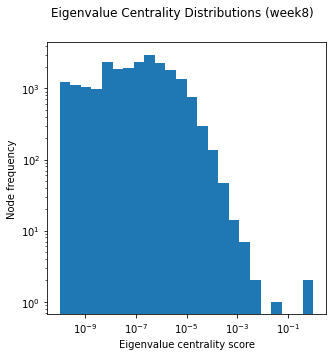

In [401]:
plt.figure(figsize = (5, 5))
plt.suptitle('Eigenvalue Centrality Distributions (week8)')
logloghist(eigen_centrality_G2.values(), 1e-10, 1)
plt.xlabel('Eigenvalue centrality score')
plt.ylabel('Node frequency')
plt.show()

### After bubble

In [376]:
[top10_degree_week13, top10_eigen_week13]=calculateStats(G3, eigen_centrality_G3)

df_after=plot_table(top10_degree_week13, top10_eigen_week13)
df_after

,Node (Degree centrality),Degree centrality,Strength (Degree centrality),Node (Eigen centrality),Eigen centrality,Degree (Eigen centrality),Strength (Eigen centrality)
1,24778,117214,24778,4987284,0.8603170868071799,540,194808.4679811002
2,4614011,1767,4987284,4086210,0.2498419360093388,9,40233.002100000005
3,1056959,1736,3547244,24778,0.24225930611221774,117214,735700.1440940073
4,5314986,870,4086210,5580241,0.10750566250631072,6,5993.69457104
5,4195093,865,5413973,5443585,0.071740053010437,5,3999.6778782399997
6,4987284,540,46606,5595338,0.07169077478305512,4,3996.16266
7,4045065,513,3456919,5580221,0.07154498978576773,4,3987.4122248000003
8,3697902,485,717202,5506636,0.07149832438911337,3,3986.20093336
9,3183164,455,4655026,5596462,0.0714944789895615,3,3985.9865431999997
10,309431,429,2781928,5519473,0.07143300524489174,4,3977.57023586


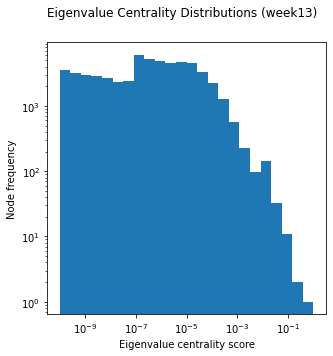

In [400]:
plt.figure(figsize = (5, 5))
plt.suptitle('Eigenvalue Centrality Distributions (week13)')
logloghist(eigen_centrality_G3.values(), 1e-10, 1)
plt.xlabel('Eigenvalue centrality score')
plt.ylabel('Node frequency')
plt.show()

I believe my chosen centrality method could effectively measure the significance of the nodes. As it is discussed previously, the **betweenness centrality** focus on analyzing the connections between multiple groups in the network, which might not be suitable for this bitcoin transaction network. 

Besides, the **closeness centrality** measure how close a node is to others. In a bitcoin network, the weight of graph represents the volume of trade, which is irrelevant to the idea of distance. The closeness centrality might be helpful when measuring social networks since the relationship between individuals can be quantified as distance.

Finally, the top 10 nodes highlighted by the eigenvalue centrality drastically change over the few weeks, especially during the bubble period. The changes of these hubs might reveal the contributing factors of price bubble of the network.

## Exercise 2.2
These nodes represent the **hubs** of the network.As the bitcoin transaction network is a BA network analyzed in Exercise 1.2. These nodes are more likely to have the following characters:

1. Higher degree. As new nodes are connected to nodes in the BA network according to the its degree, the old nodes have advantage over other nodes
1. Large influence to the network. The eigenvector centrality measures is calculated according to the centrality of surrounding nodes. This means that the nodes with high score of centrality are more likely to directly connect to other high score nodes. As a result, these nodes would have great influence to the overall network.

# Part III
## Exercise 3.1
As it is measured in Exercise 1.2, the bitcoin transaction network is more likely to be a scale-free network. It means that the network is robust to **random failures** instead of **target attacks**. Again, I take week1 (2013-09-09 to 2013-09-15) as an example, two scenarios  can be distinguished

### Attack to hubs
In this situation, the attack might cause a price crash or major disruption. As it is analyzed in Exercise 1, the bitcoin transaction network is a scale-free network, which means that most of the nodes in the network are sparsely connected while few of them have large amount of links. This means that there is large amount of bitcoins "flow" through these nodes. Once thery are attacked, large amount of bitcoins may loss. This might distory the bitcoin market as the bitcoins in circulation decrease and eventually cause a price bubble.

As it is measure in Exercise 2, the nodes with high score of centrality usually are the nodes with high strength, while the strenth in a the network actually represent the bitcoins that circulate in the market. If multiple attacks happen in a same time toward the hubs, it might cause the disruption of the whole network

### Attack to non-hub nodes
In this situation, as it is mentioned previously, only limited amount of bitcoin "flow" through these nodes. The major function of bitcoin network won't be greatly affected in a short time.

## Exercise 3.2

In this part, I track the nodes with **highest score of eigenvalue centrality in all three weeks**. The nodes are:

In [409]:
target_nodes=top10_eigen_week1[:,0]
F=[]
for G in GSCC:
    S_in=np.array([value for _, value in G.in_degree(target_nodes, weight="qty")])
    S_out=np.array([value for _, value in G.out_degree(target_nodes, weight="qty")])
    S_tot=np.array([value for _, value in G.degree(target_nodes, weight="qty")])
    F_local=np.divide((S_out-S_in),S_tot)
    F.append(F_local)
    
df_flow=pd.DataFrame(
    F,
    index=names,
    columns=list(range(1,11))
)
df_flow

,1,2,3,4,5,6,7,8,9,10
2013-09-09_to_2013-09-15,0.022488,-0.002644,0.033332,-0.000024,-0.087365,0.065325,-0.105757,-0.119089,-6.250000e-08,-0.000123
2013-09-16_to_2013-09-22,-0.028067,0.003831,0.133433,0.058316,0.042684,-0.274246,0.143569,-0.000012,-2.858881e-03,NaN
2013-09-23_to_2013-09-29,-0.014613,0.030253,0.012832,-0.116209,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-30_to_2013-10-06,-0.016825,0.010410,0.062953,-0.021533,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-07_to_2013-10-13,-0.006380,-0.121095,0.028514,0.015942,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-14_to_2013-10-20,-0.050263,0.090697,0.070483,-0.010132,-0.133035,NaN,NaN,NaN,NaN,NaN
2013-10-21_to_2013-10-27,-0.028448,0.989139,-0.000092,0.055026,0.400481,NaN,NaN,NaN,NaN,NaN
2013-10-28_to_2013-11-03,0.004757,-0.274212,0.100900,-0.579983,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-04_to_2013-11-10,0.031664,0.051245,-0.522741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-11_to_2013-11-17,0.076620,-0.098466,0.069711,0.905273,NaN,NaN,NaN,NaN,NaN,NaN


In [407]:
target_nodes=top10_eigen_week8[:,0]
F=[]
for G in GSCC:
    S_in=np.array([value for _, value in G.in_degree(target_nodes, weight="qty")])
    S_out=np.array([value for _, value in G.out_degree(target_nodes, weight="qty")])
    S_tot=np.array([value for _, value in G.degree(target_nodes, weight="qty")])
    F_local=(S_out-S_in)/S_tot
    F.append(F_local)
    
df_flow=pd.DataFrame(
    F,
    index=names,
    columns=list(range(1,11))
)
df_flow

,1,2,3,4,5,6,7,8,9,10
2013-09-09_to_2013-09-15,0.008172,-0.130435,0.065325,-1.833037e-02,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-16_to_2013-09-22,0.023608,-0.281690,0.042684,-8.573568e-02,-0.004867,NaN,NaN,NaN,NaN,NaN
2013-09-23_to_2013-09-29,-0.008714,0.083172,0.012832,-2.018064e-01,-0.000436,NaN,NaN,NaN,NaN,NaN
2013-09-30_to_2013-10-06,0.016615,-0.186312,0.062953,-2.459723e-01,-0.001351,NaN,NaN,NaN,NaN,NaN
2013-10-07_to_2013-10-13,0.011689,-0.161793,0.028514,1.649264e-01,-0.000860,NaN,NaN,NaN,NaN,NaN
2013-10-14_to_2013-10-20,-0.003830,0.538462,-0.010132,-2.496877e-01,-0.000337,NaN,NaN,NaN,NaN,NaN
2013-10-21_to_2013-10-27,-0.021287,-0.120000,0.055026,8.997891e-02,-0.026743,NaN,NaN,NaN,NaN,NaN
2013-10-28_to_2013-11-03,-0.018874,0.000000,0.100900,-1.456828e-07,-0.000143,-0.056822,-0.000104,-0.002835,-0.002346,-0.99538
2013-11-04_to_2013-11-10,-0.021071,0.372578,0.051245,-7.186376e-02,0.040880,-0.003685,NaN,NaN,NaN,NaN
2013-11-11_to_2013-11-17,0.031436,-0.529412,0.069711,-4.972325e-02,-0.006018,-0.995239,NaN,NaN,NaN,NaN


In [408]:
target_nodes=top10_eigen_week13[:,0]
F=[]
for G in GSCC:
    S_in=np.array([value for _, value in G.in_degree(target_nodes, weight="qty")])
    S_out=np.array([value for _, value in G.out_degree(target_nodes, weight="qty")])
    S_tot=np.array([value for _, value in G.degree(target_nodes, weight="qty")])
    F_local=(S_out-S_in)/S_tot
    F.append(F_local)
    
df_flow=pd.DataFrame(
    F,
    index=names,
    columns=list(range(1,11))
)
df_flow

,1,2,3,4,5,6,7,8,9,10
2013-09-09_to_2013-09-15,-0.202552,0.065325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-16_to_2013-09-22,0.042684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-23_to_2013-09-29,0.012832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-30_to_2013-10-06,0.062953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-07_to_2013-10-13,0.028514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-14_to_2013-10-20,-0.010132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-21_to_2013-10-27,0.055026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-28_to_2013-11-03,0.100900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-04_to_2013-11-10,-0.556492,0.051245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-11_to_2013-11-17,-0.008254,-0.380037,0.069711,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The result demostrates that before and after the price bubble, except the most important nodes, the hubs changes sharply. 

## Exercise 3.3

### Ocation 1
One might happen in week 8. Because in this week, the strenths of the top 10 nodes are all inputs ($S^{in}>S^{out}$). But none of these nodes keeps high value of strenths after the weeks. These nodes might be the evidence of attackers that took the advantage of hacked crypto exchanges to earn profits.

### Ocation 2

# Reference


Borgatti, S (2005): Centrality and Network Flows. Social Networks 27(1): 55-71. 

Mao, G; Zhang, N (2013): Analysis of Average Shortest-Path  Length  of  Scale-Free  Network.  Journal  of Applied Mathematics, Vol. 2013, Article ID 865643

Annika, B, Benjamin, F and Matthias, L (2014): Exploring the Bitcoin Network. Institute of Information Systems, Humboldt University Berlin, Spandauer Str. 1, 10178 Berlin, Germany 